## Train a model with Mushroom data using XGBoost algorithm
###  Model is trained with XGBoost installed in notebook instance
###  In the later examples, we will train using SageMaker's XGBoost algorithm

In [ ]:
# Install xgboost in notebook instance.
#### Command to install xgboost
!pip install xgboost==0.90

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
column_list_file = 'mushroom_train_column_list.txt'
train_file = 'mushroom_train.csv'
validation_file = 'mushroom_validation.csv'

In [3]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [4]:
columns

['class_edible',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [5]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [6]:
df_train.head()

,class_edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,0,1,2,1,0,0,3,...,0,7,7,0,2,1,4,1,3,1
1,1,3,3,4,0,7,1,0,1,0,...,1,6,6,0,2,1,0,7,4,0
2,1,2,3,9,0,2,1,0,0,2,...,1,6,6,0,2,1,2,1,4,1
3,0,0,3,8,1,0,1,0,0,10,...,2,7,7,0,2,1,4,2,2,3
4,0,5,3,2,1,5,1,0,0,7,...,2,6,3,0,2,1,4,2,4,0


In [7]:
df_validation.head()

,class_edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,2,0,8,0,5,1,1,0,7,...,2,7,7,0,2,1,0,2,0,1
1,0,5,2,3,0,5,1,1,0,5,...,2,7,7,0,2,1,0,3,3,1
2,0,5,0,8,0,5,1,1,0,4,...,2,7,7,0,2,1,0,2,0,1
3,0,5,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,4,2
4,0,5,3,3,1,5,1,0,0,5,...,2,6,6,0,2,1,4,3,5,0


In [8]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [9]:
# Launch a classifier
# XGBoost Training Parameter Reference: 
#   https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
#classifier = xgb.XGBClassifier (objective='binary:logistic',n_estimators=50)
classifier = xgb.XGBClassifier (objective='binary:logistic')

In [10]:
classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [11]:
classifier.fit(X_train,
               y_train,
               eval_set = [(X_train, y_train), (X_validation, y_validation)], 
               eval_metric=['logloss'])

[0]	validation_0-logloss:0.610494	validation_1-logloss:0.611318
[1]	validation_0-logloss:0.542749	validation_1-logloss:0.544329
[2]	validation_0-logloss:0.486324	validation_1-logloss:0.488569
[3]	validation_0-logloss:0.438525	validation_1-logloss:0.440461
[4]	validation_0-logloss:0.397609	validation_1-logloss:0.400041
[5]	validation_0-logloss:0.362406	validation_1-logloss:0.365305
[6]	validation_0-logloss:0.331748	validation_1-logloss:0.334258
[7]	validation_0-logloss:0.301364	validation_1-logloss:0.303455
[8]	validation_0-logloss:0.274899	validation_1-logloss:0.276645
[9]	validation_0-logloss:0.251852	validation_1-logloss:0.253199
[10]	validation_0-logloss:0.231697	validation_1-logloss:0.232743
[11]	validation_0-logloss:0.21465	validation_1-logloss:0.216294
[12]	validation_0-logloss:0.199659	validation_1-logloss:0.201666
[13]	validation_0-logloss:0.182005	validation_1-logloss:0.184339
[14]	validation_0-logloss:0.166673	validation_1-logloss:0.169211
[15]	validation_0-logloss:0.153101	v

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [12]:
eval_result = classifier.evals_result()

In [13]:
training_rounds = range(len(eval_result['validation_0']['logloss']))

In [14]:
print(training_rounds)

range(0, 100)


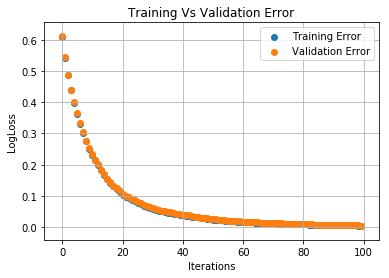

In [15]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['logloss'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['logloss'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('LogLoss')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

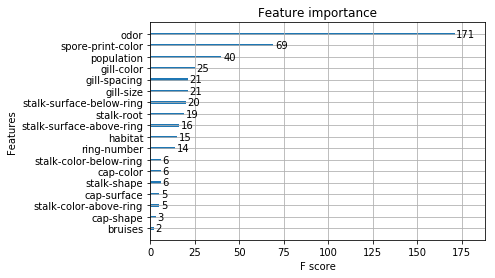

In [16]:
xgb.plot_importance(classifier)
plt.show()

In [17]:
df = pd.read_csv(validation_file,names=columns)

In [18]:
df.head()

,class_edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,2,0,8,0,5,1,1,0,7,...,2,7,7,0,2,1,0,2,0,1
1,0,5,2,3,0,5,1,1,0,5,...,2,7,7,0,2,1,0,3,3,1
2,0,5,0,8,0,5,1,1,0,4,...,2,7,7,0,2,1,0,2,0,1
3,0,5,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,4,2
4,0,5,3,3,1,5,1,0,0,5,...,2,6,6,0,2,1,4,3,5,0


In [19]:
X_test = df.iloc[:,1:]

In [20]:
result = classifier.predict(X_test)

In [21]:
result[:5]

array([0, 0, 0, 0, 0])

In [22]:
df['predicted_class'] = result

In [24]:
df.head()

,class_edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,predicted_class
0,0,2,0,8,0,5,1,1,0,7,...,7,7,0,2,1,0,2,0,1,0
1,0,5,2,3,0,5,1,1,0,5,...,7,7,0,2,1,0,3,3,1,0
2,0,5,0,8,0,5,1,1,0,4,...,7,7,0,2,1,0,2,0,1,0
3,0,5,2,4,0,5,0,0,0,5,...,5,5,0,1,1,4,0,4,2,0
4,0,5,3,3,1,5,1,0,0,5,...,6,6,0,2,1,4,3,5,0,0


In [25]:
df.class_edible.value_counts()

0    1243
1    1195
Name: class_edible, dtype: int64

In [26]:
df.predicted_class.value_counts()

0    1243
1    1195
Name: predicted_class, dtype: int64

## Binary Classifier Metrics

In [27]:
# Reference: https://scikit-learn.org/stable/modules/model_evaluation.html
# Explicitly stating labels. Pass=1, Fail=0
def true_positive(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[0, 0]

def true_negative(y_true, y_pred): 
    return confusion_matrix(y_true,y_pred,labels=[1,0])[1, 1]

def false_positive(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[1, 0]

def false_negative(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[0, 1]

In [28]:
# Compute Binary Classifier Metrics
# Returns a dictionary {"MetricName":Value,...}

def binary_classifier_metrics(y_true, y_pred):
    metrics = {}

    # References: 
    #  https://docs.aws.amazon.com/machine-learning/latest/dg/binary-classification.html
    #  https://en.wikipedia.org/wiki/Confusion_matrix
    
    # Definition:
    # true positive = tp = how many samples were correctly classified as positive (count)
    # true negative = tn = how many samples were correctly classified as negative (count)
    # false positive = fp = how many negative samples were mis-classified as positive (count)
    # false_negative = fn = how many positive samples were mis-classified as negative (count)
    
    # positive = number of positive samples (count)
    #          = true positive + false negative
    # negative = number of negative samples (count)
    #          = true negative + false positive
    
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    
    positive = tp + fn
    negative = tn + fp
    
    metrics['TruePositive'] = tp
    metrics['TrueNegative'] = tn
    metrics['FalsePositive'] = fp
    metrics['FalseNegative'] = fn
    
    metrics['Positive'] = positive
    metrics['Negative'] = negative
    
    # True Positive Rate (TPR, Recall) = true positive/positive
    # How many positives were correctly classified? (fraction)
    # Recall value closer to 1 is better. closer to 0 is worse
    if tp == 0:
        recall = 0
    else:
        recall = tp/positive
        
    metrics['Recall'] = recall
    
    # True Negative Rate = True Negative/negative
    # How many negatives were correctly classified? (fraction)
    # True Negative Rate value closer to 1 is better. closer to 0 is worse
    if tn == 0:
        tnr = 0
    else:
        tnr = tn/(negative)
    metrics['TrueNegativeRate'] = tnr
    
    # Precision = True Positive/(True Positive + False Positive)
    # How many positives classified by the algorithm are really positives? (fraction)
    # Precision value closer to 1 is better. closer to 0 is worse
    if tp == 0:
        precision = 0
    else:
        precision = tp/(tp + fp)
    metrics['Precision'] = precision
    
    # Accuracy = (True Positive + True Negative)/(total positive + total negative)
    # How many positives and negatives were correctly classified? (fraction)
    # Accuracy value closer to 1 is better. closer to 0 is worse
    accuracy = (tp + tn)/(positive + negative)
    metrics['Accuracy'] = accuracy
    
    # False Positive Rate (FPR, False Alarm) = False Positive/(total negative)
    # How many negatives were mis-classified as positives (fraction)
    # False Positive Rate value closer to 0 is better. closer to 1 is worse
    if fp == 0:
        fpr = 0
    else:
        fpr = fp/(negative)
    metrics['FalsePositiveRate'] = fpr
    
    # False Negative Rate (FNR, Misses) = False Negative/(total Positive)
    # How many positives were mis-classified as negative (fraction)
    # False Negative Rate value closer to 0 is better. closer to 1 is worse
    fnr = fn/(positive)
    metrics['FalseNegativeRate'] = fnr
    
    # F1 Score = harmonic mean of Precision and Recall
    # F1 Score closer to 1 is better. Closer to 0 is worse.
    if precision == 0 or recall == 0:
        f1 = 0
    else:        
        f1 = 2*precision*recall/(precision+recall)

    metrics['F1'] = f1
    
    return metrics

In [29]:
# Reference: 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [30]:
# Compute confusion matrix
#{0:'edible',1:'poisonous'})
cnf_matrix = confusion_matrix(df['class_edible'], df['predicted_class'],labels=[1,0])

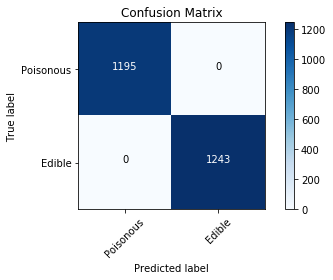

In [31]:
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Poisonous','Edible'],
                      title='Confusion Matrix')

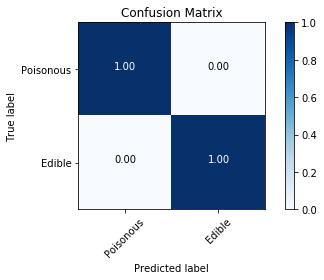

In [32]:
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Poisonous','Edible'],
                      title='Confusion Matrix',normalize=True)

In [33]:
metrics = [binary_classifier_metrics(df['class_edible'], df['predicted_class'])]
df_metrics=pd.DataFrame.from_dict(metrics)
df_metrics.index = ['Model']

In [34]:
df_metrics

,Accuracy,F1,FalseNegative,FalseNegativeRate,FalsePositive,FalsePositiveRate,Negative,Positive,Precision,Recall,TrueNegative,TrueNegativeRate,TruePositive
Model,1.0,1.0,0,0.0,0,0,1243,1195,1.0,1.0,1243,1.0,1195


In [35]:
print('Counts')
print(df_metrics[['TruePositive',
                  'FalseNegative',
                  'FalsePositive',
                  'TrueNegative',]].round(2))
print()
print('Fractions')
print(df_metrics[['Recall',
                  'FalseNegativeRate',
                  'FalsePositiveRate',
                  'TrueNegativeRate',]].round(2))
print()

print(df_metrics[['Precision',
                  'Accuracy',
                  'F1']].round(2))

Counts
       TruePositive  FalseNegative  FalsePositive  TrueNegative
Model          1195              0              0          1243

Fractions
       Recall  FalseNegativeRate  FalsePositiveRate  TrueNegativeRate
Model     1.0                0.0                  0               1.0

       Precision  Accuracy   F1
Model        1.0       1.0  1.0


In [36]:
print(classification_report(
    df['class_edible'],
    df['predicted_class'],
    labels=[1,0],
    target_names=['Poisonous','Edible']))

              precision    recall  f1-score   support

   Poisonous       1.00      1.00      1.00      1195
      Edible       1.00      1.00      1.00      1243

   micro avg       1.00      1.00      1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

